In [1]:
from datagenerator import jet_data_generator 
from pylorentz import Momentum4
from plotutils import plot_event 
import matplotlib 
import numpy as np
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

# Signal

In [3]:
sig_2p_8part = jet_data_generator("signal",0.0001, 2, 8, True)

In [4]:
start = time.time()
data_sig_2p_8part = sig_2p_8part.generate_dataset(1000)
end = time.time()
print(end-start)

21.80078625679016


In [5]:
data_sig_2p_8part.shape

(1000, 24)

In [6]:
def reconstruct_mass(row):
    particles = row.reshape(-1,3)
    summed4vec = Momentum4.m_eta_phi_pt(0,0,0,0)
    for particle in particles:
        #print(particle)
        particle4vec = Momentum4.m_eta_phi_pt(0, particle[1], particle[2], particle[0])
        summed4vec += particle4vec
    return summed4vec.m

In [7]:
def reconstruct_eta(row):
    particles = row.reshape(-1,3)
    summed4vec = Momentum4.m_eta_phi_pt(0,0,0,0)
    for particle in particles:
        #print(particle)
        particle4vec = Momentum4.m_eta_phi_pt(0, particle[1], particle[2], particle[0])
        summed4vec += particle4vec
    return summed4vec.eta

In [8]:
def reconstruct_phi(row):
    particles = row.reshape(-1,3)
    summed4vec = Momentum4.m_eta_phi_pt(0,0,0,0)
    for particle in particles:
        #print(particle)
        particle4vec = Momentum4.m_eta_phi_pt(0, particle[1], particle[2], particle[0])
        summed4vec += particle4vec
    return summed4vec.phi

In [9]:
def reconstruct_p(row):
    particles = row.reshape(-1,3)
    summed4vec = Momentum4.m_eta_phi_pt(0,0,0,0)
    for particle in particles:
        #print(particle)
        particle4vec = Momentum4.m_eta_phi_pt(0, particle[1], particle[2], particle[0])
        summed4vec += particle4vec
    return summed4vec.p

In [10]:
reconstructed_mass = np.apply_along_axis(reconstruct_mass, 1, data_sig_2p_8part)

In [13]:
true_mass = np.random.normal(172.76, 1.32)

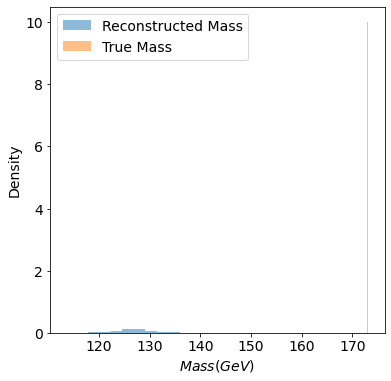

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(reconstructed_mass,alpha=0.5,density=True,label="Reconstructed Mass")
ax.hist(true_mass,alpha=0.5,density=True,label="True Mass")
ax.legend()
ax.set_xlabel(r'$Mass(GeV)$')
ax.set_ylabel('Density')
fig.savefig('./figures/MassReconstruction_signal.png')

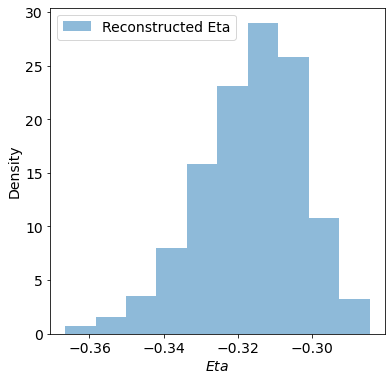

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(np.apply_along_axis(reconstruct_eta, 1, data_sig_2p_8part),alpha=0.5,density=True,label="Reconstructed Eta")
#ax.hist(true_mass,alpha=0.5,density=True,label="True Mass")
ax.legend()
ax.set_xlabel(r'$Eta$')
ax.set_ylabel('Density')
fig.savefig('./figures/EtaReconstruction_signal.png')

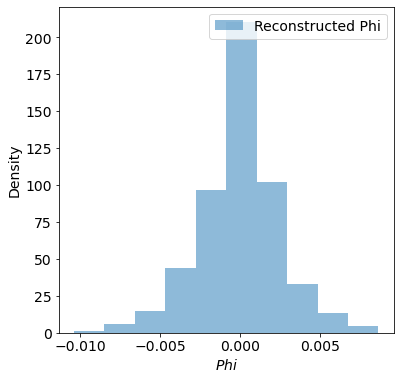

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(np.apply_along_axis(reconstruct_phi, 1, data_sig_2p_8part),alpha=0.5,density=True,label="Reconstructed Phi")
#ax.hist(true_mass,alpha=0.5,density=True,label="True Mass")
ax.legend()
ax.set_xlabel(r'$Phi$')
ax.set_ylabel('Density')
fig.savefig('./figures/PhiReconstruction_signal.png')

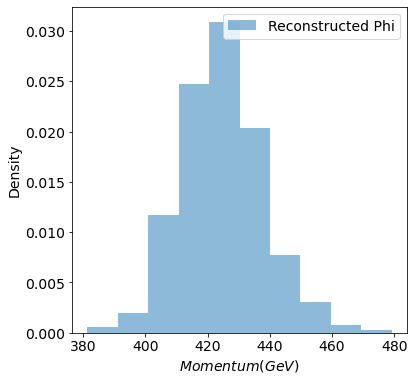

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(np.apply_along_axis(reconstruct_p, 1, data_sig_2p_8part),alpha=0.5,density=True,label="Reconstructed Phi")
#ax.hist(true_mass,alpha=0.5,density=True,label="True Mass")
ax.legend()
ax.set_xlabel(r'$Momentum(GeV)$')
ax.set_ylabel('Density')
fig.savefig('./figures/PReconstruction_signal.png')

# Background

In [55]:
bkg_2p_8part = jet_data_generator("background",0.00005, 2, 8)

In [56]:
start = time.time()
data_bkg_2p_8part = bkg_2p_8part.generate_dataset(1000)
end = time.time()
print(end-start)

8.03781795501709


In [57]:
true_mass_bkg = np.random.uniform(0,100,1000)

In [58]:
reconstructed_mass_bkg = np.apply_along_axis(reconstruct_mass, 1, data_bkg_2p_8part)

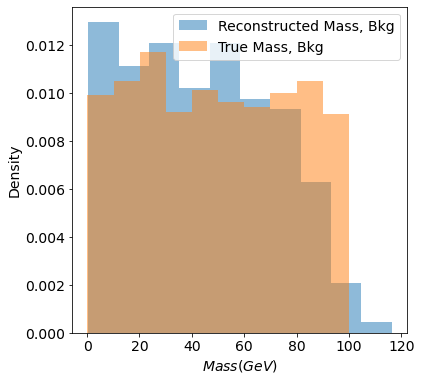

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(reconstructed_mass_bkg,alpha=0.5,density=True,label="Reconstructed Mass, Bkg")
ax.hist(true_mass_bkg,alpha=0.5,density=True,label="True Mass, Bkg")
ax.legend()
ax.set_xlabel(r'$Mass(GeV)$')
ax.set_ylabel('Density')
fig.savefig('./figures/MassReconstruction_background.png')